<a href="https://colab.research.google.com/github/ttderessa/Temesgen-Deressa/blob/main/Multinomial_Logit_Vs_Advances_in_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Comparing Multinomial Logit and Machine Learning Models for Farmers' Climate Adaptation in Ethiopia







/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step - accuracy: 0.2199 - loss: 1.6384 - val_accuracy: 0.4235 - val_loss: 1.4994 - learning_rate: 5.0000e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.3752 - loss: 1.4687 - val_accuracy: 0.4541 - val_loss: 1.4116 - learning_rate: 5.0000e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4265 - loss: 1.4627 - val_accuracy: 0.4490 - val_loss: 1.3549 - learning_rate: 5.0000e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.3969 - loss: 1.4046 - val_accuracy: 0.4592 - val_loss: 1.3250 - learning_rate: 5.0000e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.4650 - loss: 1.3168 - val_accuracy: 0.4541 - val_loss: 1.3163 - learning_rate: 5.0000e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4315 - loss: 1.2985 - val_accuracy: 0.4592 - val_loss: 1.3043 - learning_rate: 5.0000e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


<ipython-input-2-967fe2c9adf5>:164: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = accuracy_df.style.applymap(color_accuracy, subset=['Accuracy'])
<ipython-input-2-967fe2c9adf5>:175: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accuracy_df['Model'], y=accuracy_df['Accuracy'], palette=['red', 'green', 'yellow', 'pink', 'blue'])
<ipython-input-2-967fe2c9adf5>:175: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=accuracy_df['Model'], y=accuracy_df['Accuracy'], palette=['red', 'green', 'yellow', 'pink', 'blue'])


+-------------------+------------+
| Model             |   Accuracy |
+===================+============+
| CNN               |   0.422764 |
+-------------------+------------+
| Multinomial Logit |   0.536585 |
+-------------------+------------+
| KNN               |   0.556911 |
+-------------------+------------+
| SVM               |   0.560976 |
+-------------------+------------+
| XGBoost           |   0.841463 |
+-------------------+------------+
| RandomForest      |   0.857724 |
+-------------------+------------+


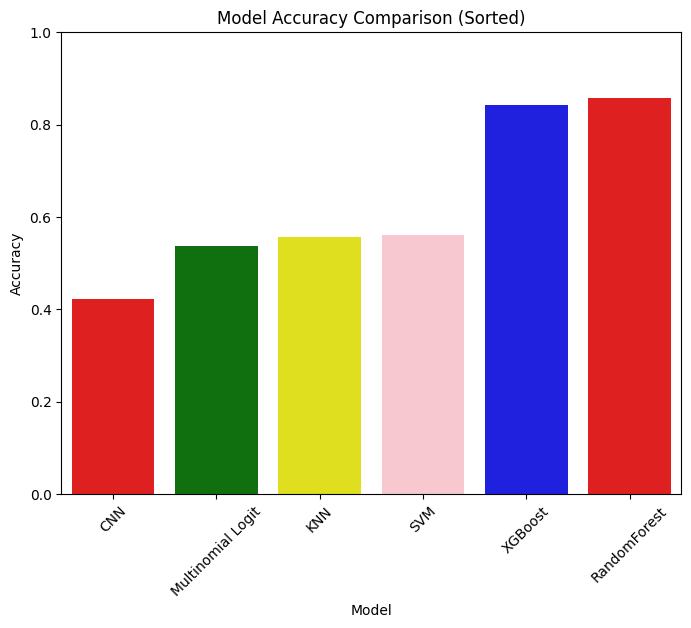

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

# Load dataset (Assume a pre-cleaned dataset file named 'climate_data.dta')
df = pd.read_stata('/content/MLDeepLearningModel.dta')

# Feature Mapping: Rename feature columns to more descriptive names
feature_mapping = {
    'edu': 'Years of education',
    'hhsize': 'Size of household',
    'gender': 'Gender of the head of household',
    'age': 'Age of the head of household',
    'inc': 'Farm income',
    'nfinc': 'Nonfarm income',
    'ownlv': 'Livestock ownership',
    'ext': 'Extension on crop and livestock',
    'extcl': 'Information on climate change',
    'ffext': 'Farmer-to-farmer extension',
    'cred': 'Credit',
    'rlgo': 'Number of relatives in got',
    'kolla': 'Local agroecology kola (lowlands)',
    'woinadega': 'Local agroecology weynadega (midlands)',
    'dega': 'Local agroecology dega (highlands)',
    'av_temp': 'Temperature',
    'av_rain': 'Precipitation'
}

# Apply the feature column renaming
df.rename(columns=feature_mapping, inplace=True)

# Label Mapping: Rename adaptation choices for clarity
label_mapping = {
    'one': 'No adaptation',
    'two': 'Planting trees',
    'three': 'Soil conservation',
    'four': 'Different crop varieties',
    'five': 'Early and late planting',
    'six': 'Irrigation'
}

# Apply the label column renaming
df.rename(columns=label_mapping, inplace=True)

# Extract feature and target variables
features = list(feature_mapping.values())  # List of feature column names
labels = list(label_mapping.values())  # List of label column names

# Prepare data for modeling
X = df[features].values  # Feature matrix
y = df[labels].values  # Target labels (one-hot encoded)

# Handle missing values by replacing NaN with zeros
X = np.nan_to_num(X, nan=0)
y = np.nan_to_num(y, nan=0)

# Split the dataset into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Standardize features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Reshape the data for CNN input (adding a third dimension)
X_train_3d = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val_3d = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test_3d = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the CNN model architecture
cnn_model = Sequential([
    Conv1D(64, 3, activation='relu', input_shape=(X_train_3d.shape[1], 1)),  # First convolution layer
    MaxPooling1D(pool_size=2),  # Max pooling layer
    Dropout(0.4),  # Dropout layer to prevent overfitting
    Conv1D(128, 3, activation='relu'),  # Second convolution layer
    MaxPooling1D(pool_size=2),  # Max pooling layer
    Dropout(0.4),  # Dropout layer
    Flatten(),  # Flatten the output for the fully connected layers
    Dense(128, activation='relu'),  # Fully connected layer
    Dropout(0.4),  # Dropout layer
    Dense(64, activation='relu'),  # Fully connected layer
    Dense(y_train.shape[1], activation='softmax')  # Output layer with softmax activation for multi-class classification
])

# Compile the model
cnn_model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks to stop early if the model isn't improving and reduce the learning rate if needed
callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-6)
]

# Train the CNN model
cnn_history = cnn_model.fit(X_train_3d, y_train, epochs=100, batch_size=32, validation_data=(X_val_3d, y_val), callbacks=callbacks)

# Train other machine learning models for comparison
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(labels), eval_metric='mlogloss')
xgb_model.fit(X_train, y_train.argmax(axis=1))

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train.argmax(axis=1))

svm_model = SVC(kernel='linear', decision_function_shape='ovr', probability=True)
svm_model.fit(X_train, y_train.argmax(axis=1))

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train.argmax(axis=1))

mnl_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)
mnl_model.fit(X_train, y_train.argmax(axis=1))

# Store model performance for evaluation
model_results = {
    'CNN': accuracy_score(y_test.argmax(axis=1), cnn_model.predict(X_test_3d).argmax(axis=1))
}

# Evaluate all models and store the results
models = {
    'XGBoost': xgb_model,
    'RandomForest': rf_model,
    'SVM': svm_model,
    'KNN': knn_model,
    'Multinomial Logit': mnl_model
}

# Evaluate the models
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test.argmax(axis=1), y_pred)
    model_results[model_name] = accuracy

# Sort and display the model performance results
sorted_results = sorted(model_results.items(), key=lambda x: x[1])
model_names, accuracies = zip(*sorted_results)

# Convert results to a DataFrame for easier visualization
accuracy_df = pd.DataFrame(list(zip(model_names, accuracies)), columns=['Model', 'Accuracy'])
accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=True)

# Style the table and add color based on accuracy
def color_accuracy(val):
    color = 'green' if val > 0.9 else 'yellow' if val > 0.8 else 'red'
    return f'background-color: {color}'

# Apply color styling to the DataFrame
styled_df = accuracy_df.style.applymap(color_accuracy, subset=['Accuracy'])

# Display the styled DataFrame as a table
styled_df

# Print the results as a table (using the 'tabulate' method for a clean, publishable format)
table = tabulate(accuracy_df, headers='keys', tablefmt='grid', showindex=False)
print(table)

# Plot the accuracy comparison using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=accuracy_df['Model'], y=accuracy_df['Accuracy'], palette=['red', 'green', 'yellow', 'pink', 'blue'])
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.title('Model Accuracy Comparison (Sorted)')
plt.ylim(0, 1)  # Ensure y-axis is between 0 and 1 for better visualization
plt.show()
